<a href="https://colab.research.google.com/github/Maryann-dev/Data-Science-Work/blob/main/DDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Objective
#The office has secured an externalgrant to improve school infrastructure and resource allocation
#They require data-driven insights to prioritize investments effectively
#Key goal is to ensure equitable access to educa5on for all pupils in Nairobi
#To localize the most significant gaps in the current education infrastructure

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import all data
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kenya_primary_schools.csv')
data.head(10)

,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,Type3,...,OthersF,NoTeaching,NonTeachin,Province,District,Division,Location,Costituenc,Latitude,Longitude
0,36.14,0.27,10001,CHEBIREBEI PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.27,36.14
1,36.17,0.26,10002,WASEGES PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.26,36.17
2,36.18,0.24,10003,KIRIBOT PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.24,36.18
3,36.19,0.21,10004,KABUSWO PRI SCH,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,2.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.21,36.19
4,37.70,-0.88,10005,VONDENI PRI SCHOOL,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,EASTERN,MACHAKOS,MASINGA,KIVAA,MASINGA,-0.88,37.70
5,36.10,0.07,10006,POMBO PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,NGENDALEL,0.07,36.10
6,36.13,0.10,10007,KIPNYUNGUNY PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,NGENDALEL,0.10,36.13
7,36.14,0.13,10008,KABERGEI PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,OLKOKWE,0.13,36.14
8,35.54,0.37,10009,KOPTEGA PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,0.0,RIFT VALLEY,KEIYO,CHEPKORIO,KEIYO SOUTH,MARICHOR,0.37,35.54
9,36.09,0.11,10010,CHOMIEK PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,OLDEBES,0.11,36.09


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31230 entries, 0 to 31229
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            31230 non-null  float64
 1   Y            31230 non-null  float64
 2   FID          31230 non-null  int64  
 3   Name_of_Sc   31229 non-null  object 
 4   Level_       31229 non-null  object 
 5   Status       31229 non-null  object 
 6   SchSponsor   31229 non-null  object 
 7   Type1        31229 non-null  object 
 8   Type2        31229 non-null  object 
 9   Type3        31229 non-null  object 
 10  PupilTeach   31229 non-null  float64
 11  ClassrmRat   31229 non-null  float64
 12  ToiletRati   31229 non-null  float64
 13  No_Classrm   31229 non-null  float64
 14  BoysToilet   31229 non-null  float64
 15  GirlsToilet  31229 non-null  float64
 16  TeachersTo   31229 non-null  float64
 17  TotalToile   31229 non-null  float64
 18  TotalBoys    31229 non-null  float64
 19  Tota

In [ ]:
data.set_index("Province", inplace=True)
data.head()

,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,Type3,...,OthersM,OthersF,NoTeaching,NonTeachin,District,Division,Location,Costituenc,Latitude,Longitude
Province,,,,,,,,,,,,,,,,,,,,,
RIFT VALLEY,36.14,0.27,10001,CHEBIREBEI PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,0.0,0.0,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.27,36.14
RIFT VALLEY,36.17,0.26,10002,WASEGES PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,1.0,1.0,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.26,36.17
RIFT VALLEY,36.18,0.24,10003,KIRIBOT PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,1.0,1.0,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.24,36.18
RIFT VALLEY,36.19,0.21,10004,KABUSWO PRI SCH,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,2.0,0.0,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.21,36.19
EASTERN,37.70,-0.88,10005,VONDENI PRI SCHOOL,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,1.0,1.0,MACHAKOS,MASINGA,KIVAA,MASINGA,-0.88,37.70


In [ ]:
data.reset_index(inplace=True)
data.head()

,Province,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,...,OthersM,OthersF,NoTeaching,NonTeachin,District,Division,Location,Costituenc,Latitude,Longitude
0,RIFT VALLEY,36.14,0.27,10001,CHEBIREBEI PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,...,0.0,0.0,0.0,0.0,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.27,36.14
1,RIFT VALLEY,36.17,0.26,10002,WASEGES PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,...,0.0,0.0,1.0,1.0,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.26,36.17
2,RIFT VALLEY,36.18,0.24,10003,KIRIBOT PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,...,0.0,0.0,1.0,1.0,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.24,36.18
3,RIFT VALLEY,36.19,0.21,10004,KABUSWO PRI SCH,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,...,0.0,0.0,2.0,0.0,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.21,36.19
4,EASTERN,37.70,-0.88,10005,VONDENI PRI SCHOOL,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,...,0.0,0.0,1.0,1.0,MACHAKOS,MASINGA,KIVAA,MASINGA,-0.88,37.70


In [ ]:
nairobi_data = data[data['Province'] == 'NAIROBI']
print(nairobi_data.info())
print(nairobi_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 587 to 22994
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Province     1241 non-null   object 
 1   X            1241 non-null   float64
 2   Y            1241 non-null   float64
 3   FID          1241 non-null   int64  
 4   Name_of_Sc   1241 non-null   object 
 5   Level_       1241 non-null   object 
 6   Status       1241 non-null   object 
 7   SchSponsor   1241 non-null   object 
 8   Type1        1241 non-null   object 
 9   Type2        1241 non-null   object 
 10  Type3        1241 non-null   object 
 11  PupilTeach   1241 non-null   float64
 12  ClassrmRat   1241 non-null   float64
 13  ToiletRati   1241 non-null   float64
 14  No_Classrm   1241 non-null   float64
 15  BoysToilet   1241 non-null   float64
 16  GirlsToilet  1241 non-null   float64
 17  TeachersTo   1241 non-null   float64
 18  TotalToile   1241 non-null   float64
 19  TotalBoy

The analysis below uses the mean of each ratio; PupilTeach, ClassrmRat and Toilet Ratio to determine which schools require improvement in infrastructure and more resources to build classrooms, Toilets and hire more teachers.

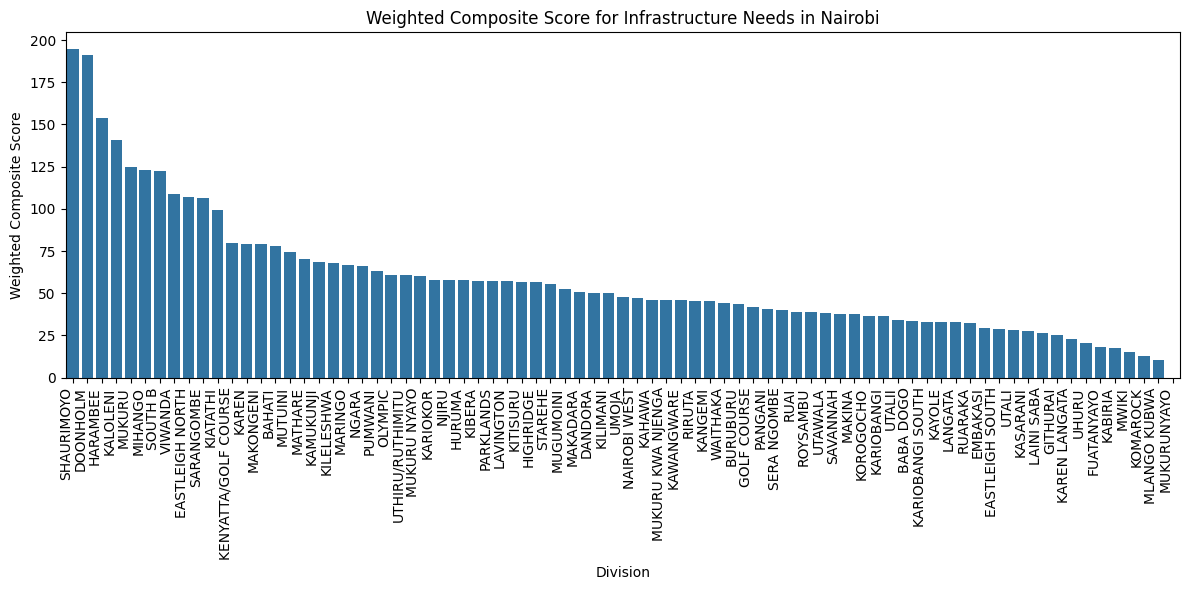

In [ ]:
nairobi_data = data[data['Province'] == 'NAIROBI']

location_data = nairobi_data.groupby('Location')[['PupilTeach', 'ClassrmRat', 'ToiletRati', 'TotalEnrol']].mean()

# 2. Consider Enrollment: Create a weighted composite score
# You might need to adjust the weights based on your priorities
weights = {'PupilTeach': 0.4, 'ClassrmRat': 0.3, 'ToiletRati': 0.2, 'TotalEnrol': 0.1}
location_data['WeightedCompositeScore'] = (
    location_data['PupilTeach'] * weights['PupilTeach'] +
    location_data['ClassrmRat'] * weights['ClassrmRat'] +
    location_data['ToiletRati'] * weights['ToiletRati'] +
    location_data['TotalEnrol'] * weights['TotalEnrol']
)

# Sort locations by the weighted composite score
location_data = location_data.sort_values('WeightedCompositeScore', ascending=False)
#print(location_data.head(10))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_data.index, y='WeightedCompositeScore', data=location_data)
plt.title('Weighted Composite Score for Infrastructure Needs in Nairobi')
plt.xlabel('Division')
plt.ylabel('Weighted Composite Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

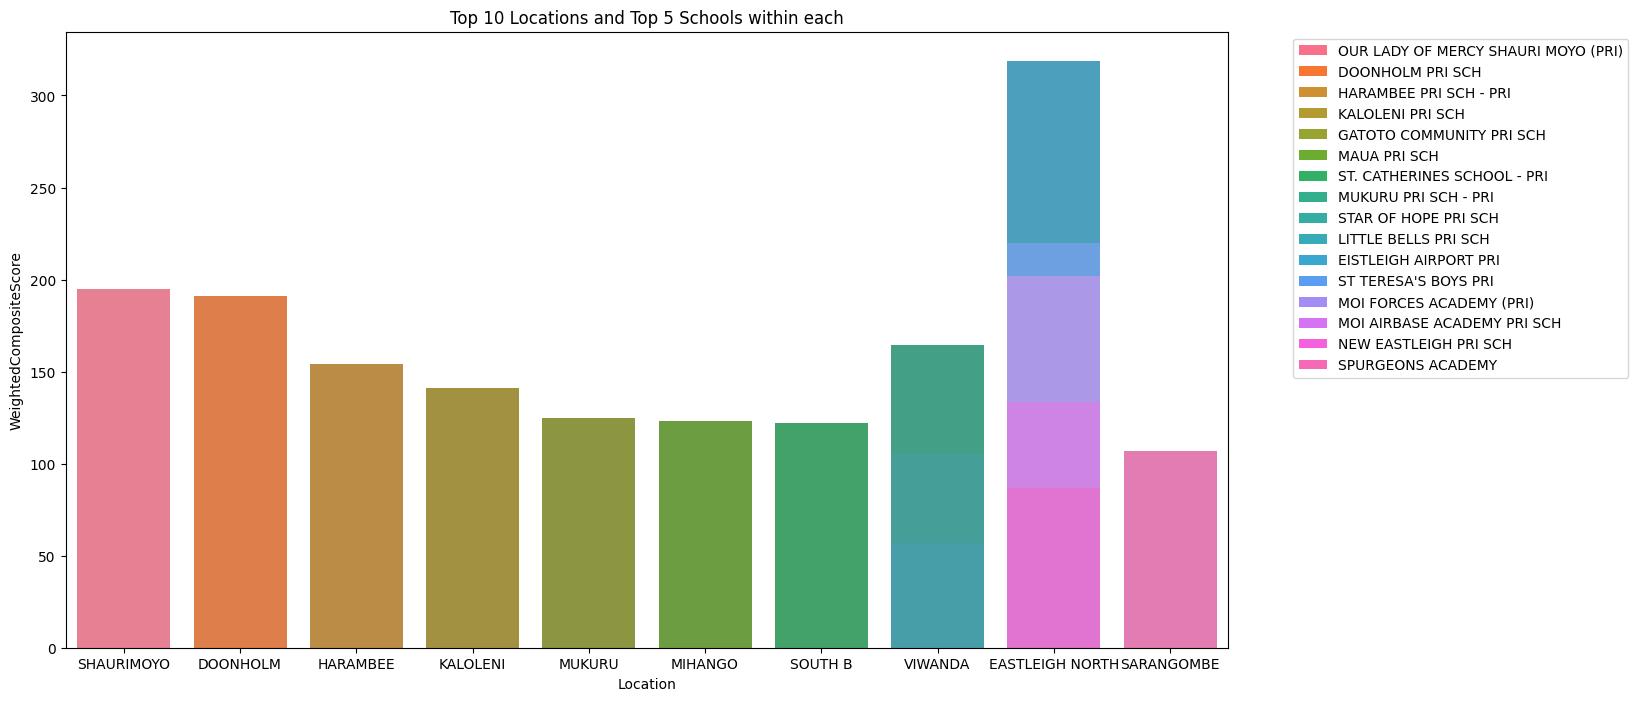

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
nairobi_data = data[data['Province'] == 'NAIROBI']

# Calculate weighted composite score for each school
location_data = nairobi_data.groupby('Name_of_Sc')[['PupilTeach', 'ClassrmRat', 'ToiletRati', 'TotalEnrol']].mean()
weights = {'PupilTeach': 0.4, 'ClassrmRat': 0.3, 'ToiletRati': 0.2, 'TotalEnrol': 0.1}
location_data['WeightedCompositeScore'] = (
    location_data['PupilTeach'] * weights['PupilTeach'] +
    location_data['ClassrmRat'] * weights['ClassrmRat'] +
    location_data['ToiletRati'] * weights['ToiletRati'] +
    location_data['TotalEnrol'] * weights['TotalEnrol']
)

nairobi_data = pd.merge(nairobi_data, location_data[['WeightedCompositeScore']], left_on='Name_of_Sc', right_index=True, how='left')

# Get top 10 locations based on mean WeightedCompositeScore
top_10_locations = nairobi_data.groupby('Location')['WeightedCompositeScore'].mean().sort_values(ascending=False).head(10).index.tolist()


# Get top 5 schools in each top location
top_schools_by_location = {}
for location in top_10_locations:
    # Filter data for the current location
    location_schools = nairobi_data[nairobi_data['Location'] == location]

    # Sort by the weighted composite score and get top 5 schools
    top_5_schools = location_schools.sort_values('WeightedCompositeScore', ascending=False).head(5)['Name_of_Sc'].tolist()
    top_schools_by_location[location] = top_5_schools

# Create a DataFrame for plotting
plot_data = []
for location, schools in top_schools_by_location.items():
    for school in schools:
        score = location_data.loc[school, 'WeightedCompositeScore']
        plot_data.append([location, school, score])

plot_df = pd.DataFrame(plot_data, columns=['Location', 'School', 'WeightedCompositeScore'])

# Create the nested bar plot
plt.figure(figsize=(15, 8))

# Get unique school names for the legend
unique_schools = plot_df['School'].unique()

# Create handles and labels for the legend
handles = []
labels = []
# Get a color palette with enough colors for all schools
num_colors = len(unique_schools)
palette = sns.color_palette("husl", num_colors) # Using "husl" for a wider range of colors

for i, school in enumerate(unique_schools):
    # Create a dummy bar plot for each school to get a handle
    handle = plt.bar(0, 0, label=school, color=palette[i % num_colors]) # Use modulo to cycle through colors if needed
    handles.append(handle[0])
    labels.append(school)

# Create the actual bar plot
sns.barplot(x='Location', y='WeightedCompositeScore', hue='School', data=plot_df, dodge=False)  # Set dodge=False for stacked bars

# Add the legend
plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 10 Locations and Top 5 Schools within each')
plt.xlabel('Location')
plt.ylabel


Schools that may require more funding:
OLYMPIC PRI SCH
EISTLEIGH AIRPORT PRI
KIBERA PRI. SCH.
KAYOLE 1 PRI SCH
HURUMA PRI SCH
NDURURUNO PRI SCH
AYANI ESTATE PRI SCH
DAIMA PRI SCH
BABADOGO PRI SCH
MOI FORCES ACADEMY (PRI)
IMARA PRI SCH
NEWLIGHT ACADEMY KAYOLE


<ipython-input-58-3458b19fb7be>:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_colors).colors


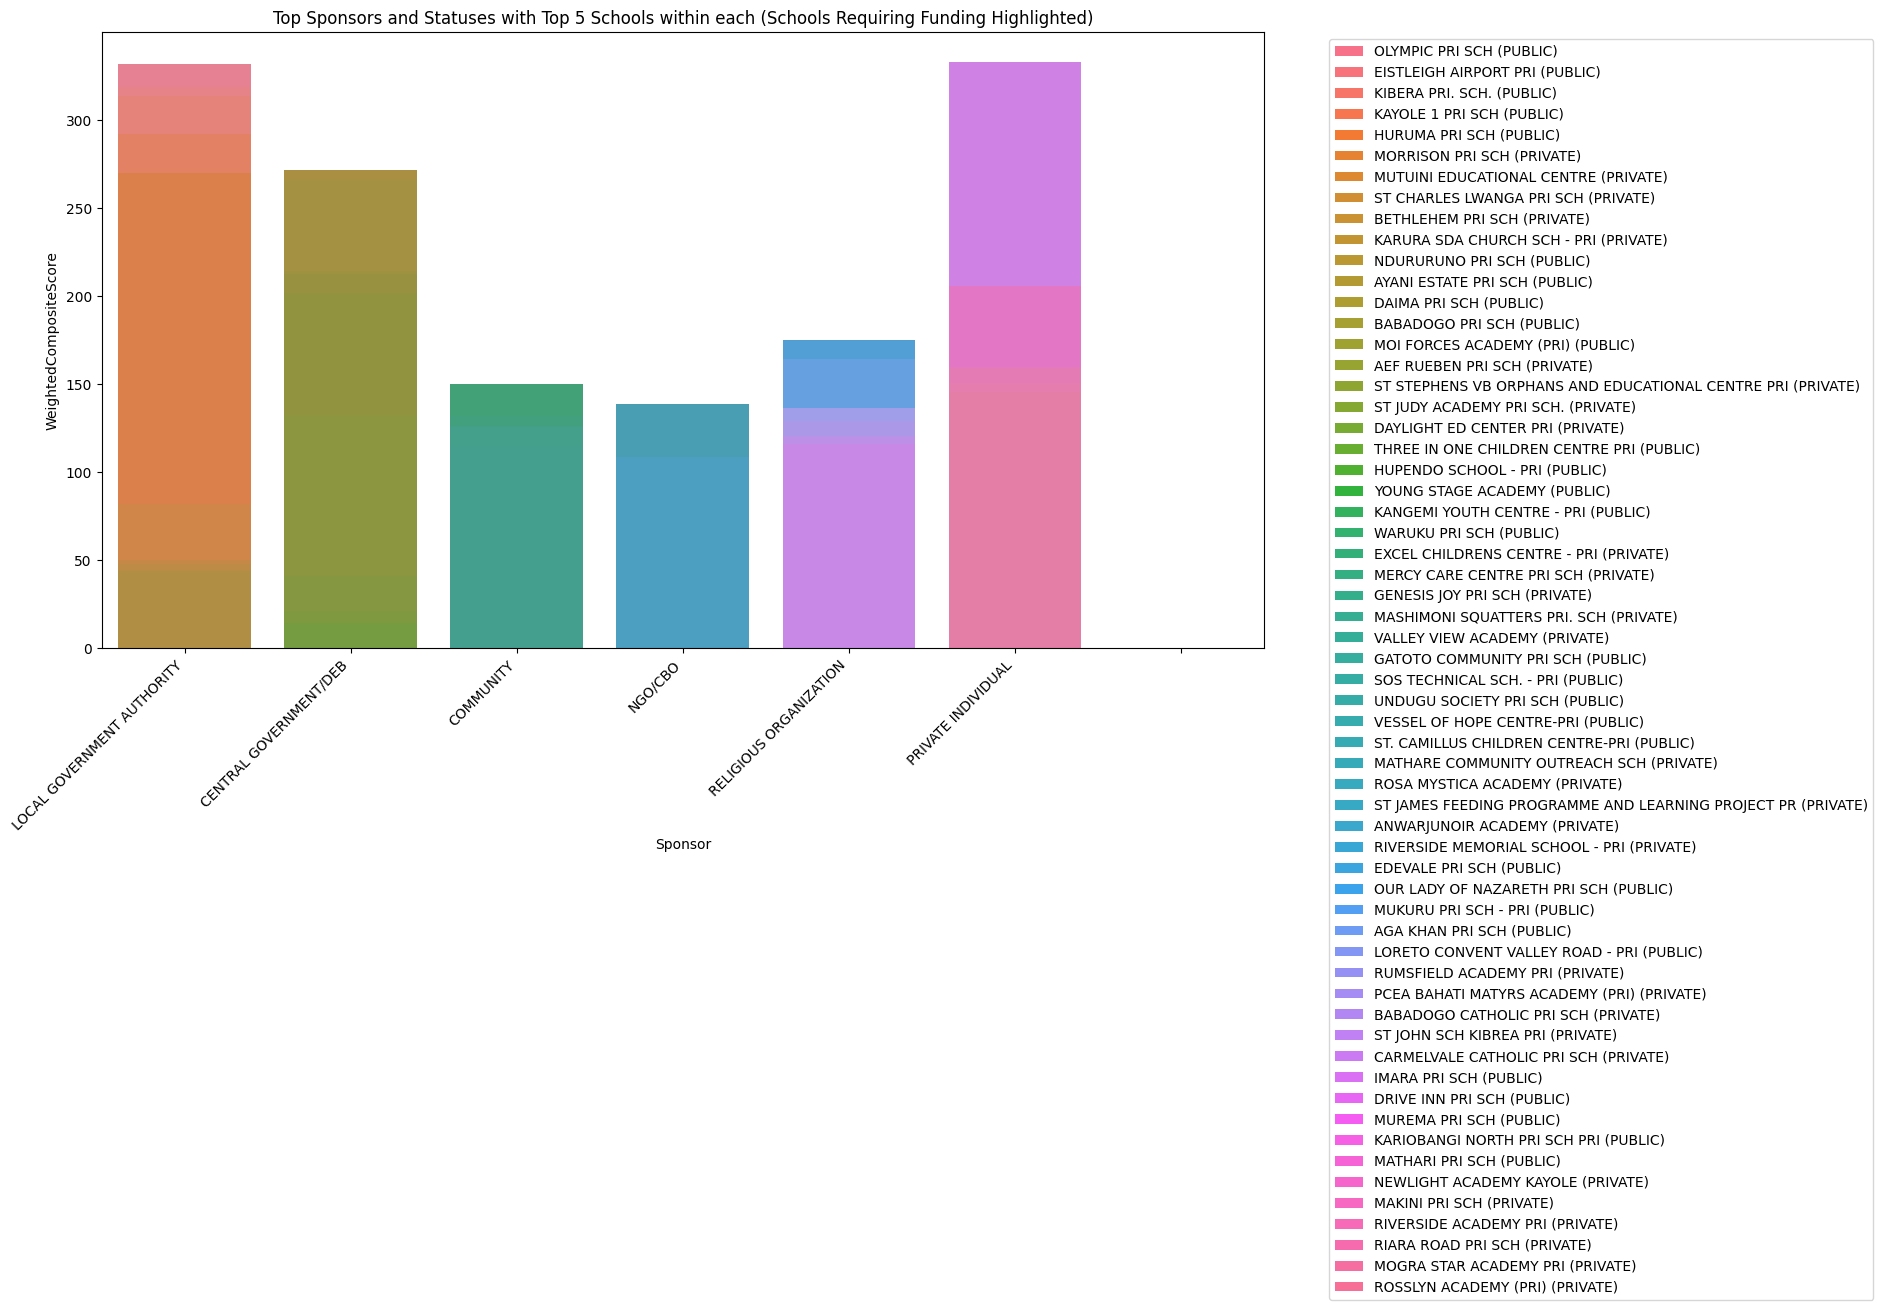

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Assuming 'data' is your DataFrame
nairobi_data = data[data['Province'] == 'NAIROBI']

# Calculate weighted composite score for each school
location_data = nairobi_data.groupby('Name_of_Sc')[['PupilTeach', 'ClassrmRat', 'ToiletRati', 'TotalEnrol']].mean()
weights = {'PupilTeach': 0.4, 'ClassrmRat': 0.3, 'ToiletRati': 0.2, 'TotalEnrol': 0.1}
location_data['WeightedCompositeScore'] = (
    location_data['PupilTeach'] * weights['PupilTeach'] +
    location_data['ClassrmRat'] * weights['ClassrmRat'] +
    location_data['ToiletRati'] * weights['ToiletRati'] +
    location_data['TotalEnrol'] * weights['TotalEnrol']
)

nairobi_data = pd.merge(nairobi_data, location_data[['WeightedCompositeScore']], left_on='Name_of_Sc', right_index=True, how='left')

# Get top sponsors and statuses based on mean WeightedCompositeScore
top_sponsors = nairobi_data.groupby('SchSponsor')['WeightedCompositeScore'].mean().sort_values(ascending=False).head(10).index.tolist()
top_statuses = nairobi_data.groupby('Status')['WeightedCompositeScore'].mean().sort_values(ascending=False).head(5).index.tolist()

# Get top 5 schools in each top sponsor and status combination
top_schools_by_sponsor_status = {}
for sponsor in top_sponsors:
    for status in top_statuses:
        # Filter data for the current sponsor and status
        sponsor_status_schools = nairobi_data[(nairobi_data['SchSponsor'] == sponsor) & (nairobi_data['Status'] == status)]

        # Sort by the weighted composite score and get top 5 schools
        top_5_schools = sponsor_status_schools.sort_values('WeightedCompositeScore', ascending=False).head(5)['Name_of_Sc'].tolist()
        top_schools_by_sponsor_status[(sponsor, status)] = top_5_schools

# Create a DataFrame for plotting
plot_data = []
for (sponsor, status), schools in top_schools_by_sponsor_status.items():
    for school in schools:
        # Check if the school exists in location_data index before accessing it
        if school in location_data.index:
            score = location_data.loc[school, 'WeightedCompositeScore']
            plot_data.append([sponsor, status, school, score])
        else:
            print(f"Warning: School '{school}' not found in location_data. Skipping...")

plot_df = pd.DataFrame(plot_data, columns=['SchSponsor', 'Status', 'School', 'WeightedCompositeScore'])

# Identify schools that may require more funding (e.g., top 20% based on score)
funding_threshold = plot_df['WeightedCompositeScore'].quantile(0.8)  # Adjust quantile as needed
schools_requiring_funding = plot_df[plot_df['WeightedCompositeScore'] >= funding_threshold]['School'].tolist()

print("\nSchools that may require more funding:")
for school in schools_requiring_funding:
    print(school)

# Create the nested bar plot
plt.figure(figsize=(15, 8))

# Get a color palette with enough colors for all schools
num_colors = len(unique_schools)

# Use a colormap with a wide range of colors (e.g., 'viridis', 'magma', 'plasma', etc.)
colors = cm.get_cmap('viridis', num_colors).colors

# Get unique school names for the legend
#unique_schools = plot_df['School'].unique()
unique_schools = plot_df[['School', 'Status']].drop_duplicates()

# Create handles and labels for the legend
handles = []
labels = []
# Get a color palette with enough colors for all schools
num_colors = len(unique_schools)
palette = sns.color_palette("husl", num_colors) # Using "husl" for a wider range of colors

#for i, school in enumerate(unique_schools):
    # Create a dummy bar plot for each school to get a handle
    #handle = plt.bar(0, 0, label=school, color=palette[i]) # Use modulo to cycle through colors if needed
    #handles.append(handle[0])
    #labels.append(school)
for i, row in unique_schools.iterrows():
    school, status = row['School'], row['Status']
    handle = plt.bar(0, 0, label=f"{school} ({status})", color=palette[i])
    handles.append(handle[0])
    labels.append(f"{school} ({status})")  # Include status in labels


# Create the actual bar plot
sns.barplot(x='SchSponsor', y='WeightedCompositeScore', hue='School', data=plot_df, dodge=False)  # Set dodge=False for stacked bars

# Add the legend
plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top Sponsors and Statuses with Top 5 Schools within each (Schools Requiring Funding Highlighted)')
plt.xlabel('Sponsor')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import geopandas as gpd
import folium

nairobi_data = data[data['Province'] == 'NAIROBI']

# 1. Create a GeoDataFrame
gdf = gpd.GeoDataFrame(nairobi_data, geometry=gpd.points_from_xy(nairobi_data.Longitude, nairobi_data.Latitude))

# 2. Set Coordinate Reference System (CRS)
gdf.crs = 'EPSG:4326' # WGS 84 (common for latitude/longitude)

# Assuming 'location_data' DataFrame from 'ipython-input-20-ef02fdcf908b' is available
# Rename 'WeightedCompositeScore' to 'LocationScore' (or any other name) in 'location_data'
location_data = location_data.rename(columns={'WeightedCompositeScore': 'LocationScore'})

# Merge 'location_data' with 'gdf' based on 'Location'
gdf = gdf.merge(location_data[['LocationScore']], on='Location', how='left')

# 3. Create a Folium Map
# Center the map on Nairobi's coordinates
nairobi_center = [nairobi_data['Latitude'].mean(), nairobi_data['Longitude'].mean()]
m = folium.Map(location=nairobi_center, zoom_start=12)


# 5. Add School Markers to the Map
threshold = 50
# Color-code markers based on LocationScore
for idx, row in gdf.iterrows():
    color = 'red' if row['LocationScore'] > threshold else 'blue'
    popup_html = f'<font color="{color}">{row["Name_of_Sc"]}</font>'  # HTML for colored text

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=folium.Popup(popup_html, max_width=200)  # Use Popup for HTML
    ).add_to(m)

# 5. Display the Map
display(m)

The Analysis shown has used 50 as the threshold for Pupil to Teacher ratio. It initially finds the number of locations in Nairobi above 50.

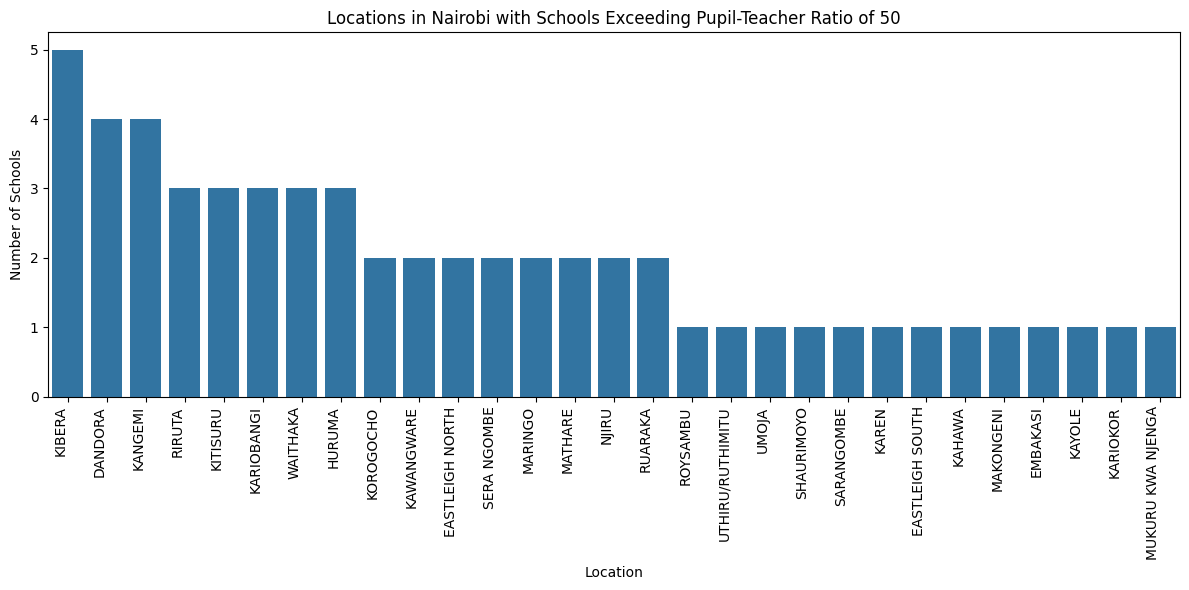

In [ ]:
# Set a threshold for a high pupil-teacher ratio
threshold = 50  # Adjust this value as needed

# Filter schools above the threshold
high_PupilTeach_ratio_schools = nairobi_data[nairobi_data['PupilTeach'] > threshold]

# Group by location and count the number of schools above the threshold
location_counts = high_PupilTeach_ratio_schools.groupby('Location')['Name_of_Sc'].count().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title(f'Locations in Nairobi with Schools Exceeding Pupil-Teacher Ratio of {threshold}')
plt.xlabel('Location')
plt.ylabel('Number of Schools')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We further, visualize the schools for the top 4 locations with the highest Pupil to Teacher ratios above 50.

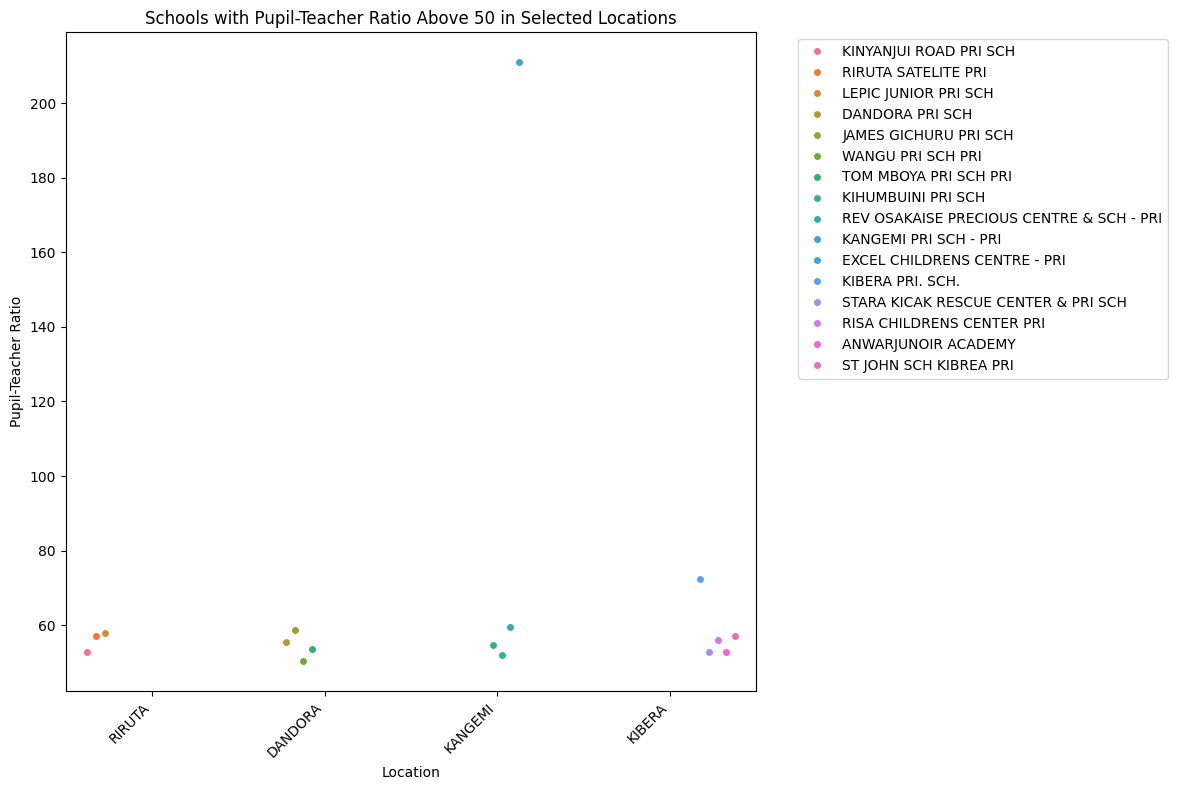

In [ ]:
selected_locations = ['KIBERA', 'DANDORA', 'KANGEMI', 'RIRUTA']
threshold = 50

# Filter the Nairobi data for the selected locations and the threshold
filtered_data = nairobi_data[
    (nairobi_data['Location'].isin(selected_locations)) & (nairobi_data['PupilTeach'] > threshold)
]

# Create a swarm plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.swarmplot(x='Location', y='PupilTeach', data=filtered_data, hue='Name_of_Sc', dodge=True)
plt.title(f'Schools with Pupil-Teacher Ratio Above {threshold} in Selected Locations')
plt.xlabel('Location')
plt.ylabel('Pupil-Teacher Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

The Analysis shows the Correlation between PupilTeach and TotalEnrol

Correlation between Pupil-Teacher Ratio and Total Enrollment in KIBERA: 0.6497397379901789


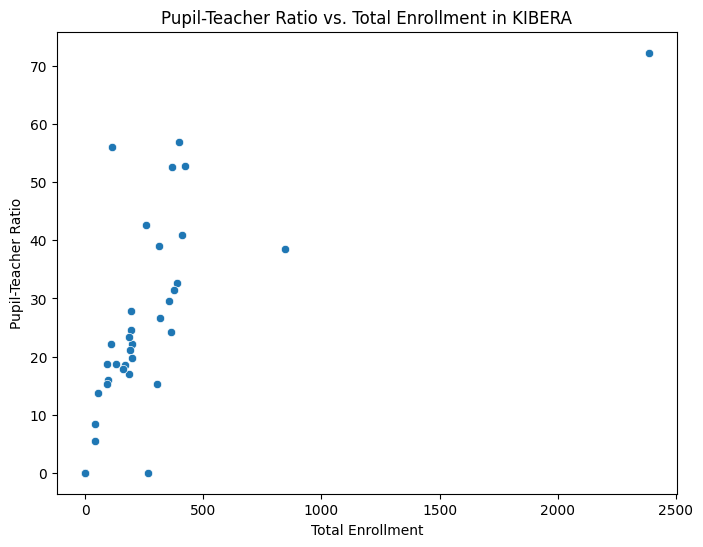

Correlation between Pupil-Teacher Ratio and Total Enrollment in DANDORA: 0.9049204738884731


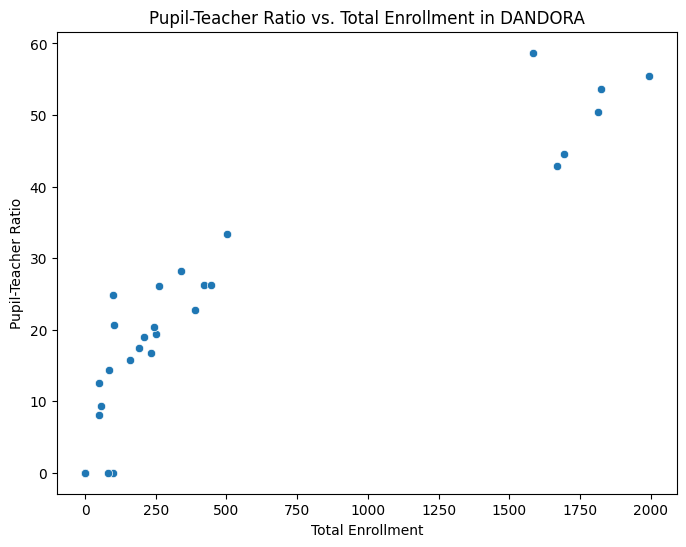

Correlation between Pupil-Teacher Ratio and Total Enrollment in KANGEMI: 0.4548421481048403


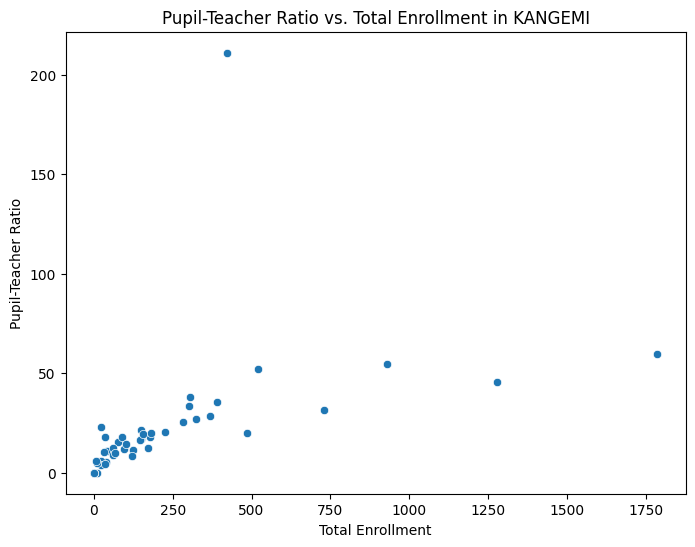

Correlation between Pupil-Teacher Ratio and Total Enrollment in RIRUTA: 0.8646411052937035


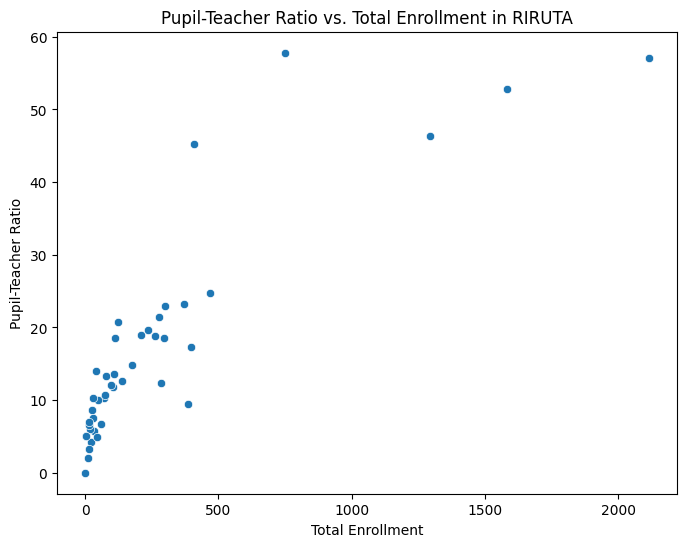

In [ ]:
#selected_locations = ['KIBERA', 'DANDORA', 'KANGEMI', 'RIRUTA']

for location in selected_locations:
    location_data = nairobi_data[nairobi_data['Location'] == location]
    # Correlation
    correlation = location_data['PupilTeach'].corr(location_data['TotalEnrol'])
    print(f"Correlation between Pupil-Teacher Ratio and Total Enrollment in {location}: {correlation}")

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TotalEnrol', y='PupilTeach', data=location_data)
    plt.title(f'Pupil-Teacher Ratio vs. Total Enrollment in {location}')
    plt.xlabel('Total Enrollment')
    plt.ylabel('Pupil-Teacher Ratio')
    plt.show()

In [ ]:
County_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kenya-populationland-area-population-density_by_subcounty (1).csv')
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kenya_primary_schools.csv')
County_data.head()
County_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   National/ County                     396 non-null    object 
 1   Population                           396 non-null    int64  
 2   Land Area (Sq. Km)                   396 non-null    float64
 3   Population Density (No. per Sq. Km)  396 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.5+ KB


In [ ]:
County_data.rename(columns={'National/ County':'Division'}, inplace=True)

Total_Population = "Total Population"  # Define the variable

County_data[Total_Population] = County_data["Land Area (Sq. Km)"] * County_data["Population Density (No. per Sq. Km)"]

# Verify the Calculation
print(County_data[['Land Area (Sq. Km)', 'Population Density (No. per Sq. Km)', 'Total Population']].head()) # Display the head of columns used in calculations

County_data.head()


   Land Area (Sq. Km)  Population Density (No. per Sq. Km)  Total Population
0            580876.3                                   82        47631856.6
1               219.9                                 5495         1208350.5
2                17.7                                 7457          131988.9
3                36.9                                 4432          163540.8
4                87.7                                 3328          291865.6


,Division,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km),Total Population,temp_id
0,kenya,47564296,580876.3,82,47631856.6,0
1,mombasa,1208333,219.9,5495,1208350.5,0
2,changamwe,131882,17.7,7457,131988.9,0
3,jomvu,163415,36.9,4432,163540.8,0
4,kisauni,291930,87.7,3328,291865.6,0


In [ ]:
County_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Updated_kenya-populationland-area-population-density_by_subcounty (1).csv')

County_data['Division'] = County_data['Division'].str.strip().str.lower()
data['Division'] = data['Division'].str.strip().str.lower()

data = pd.merge(data, County_data[['Division', 'Total Population']], on='Division', how='left')

# Verify the merge
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31230 entries, 0 to 31229
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X                   31230 non-null  float64
 1   Y                   31230 non-null  float64
 2   FID                 31230 non-null  int64  
 3   Name_of_Sc          31229 non-null  object 
 4   Level_              31229 non-null  object 
 5   Status              31229 non-null  object 
 6   SchSponsor          31229 non-null  object 
 7   Type1               31229 non-null  object 
 8   Type2               31229 non-null  object 
 9   Type3               31229 non-null  object 
 10  PupilTeach          31229 non-null  float64
 11  ClassrmRat          31229 non-null  float64
 12  ToiletRati          31229 non-null  float64
 13  No_Classrm          31229 non-null  float64
 14  BoysToilet          31229 non-null  float64
 15  GirlsToilet         31229 non-null  float64
 16  Teac

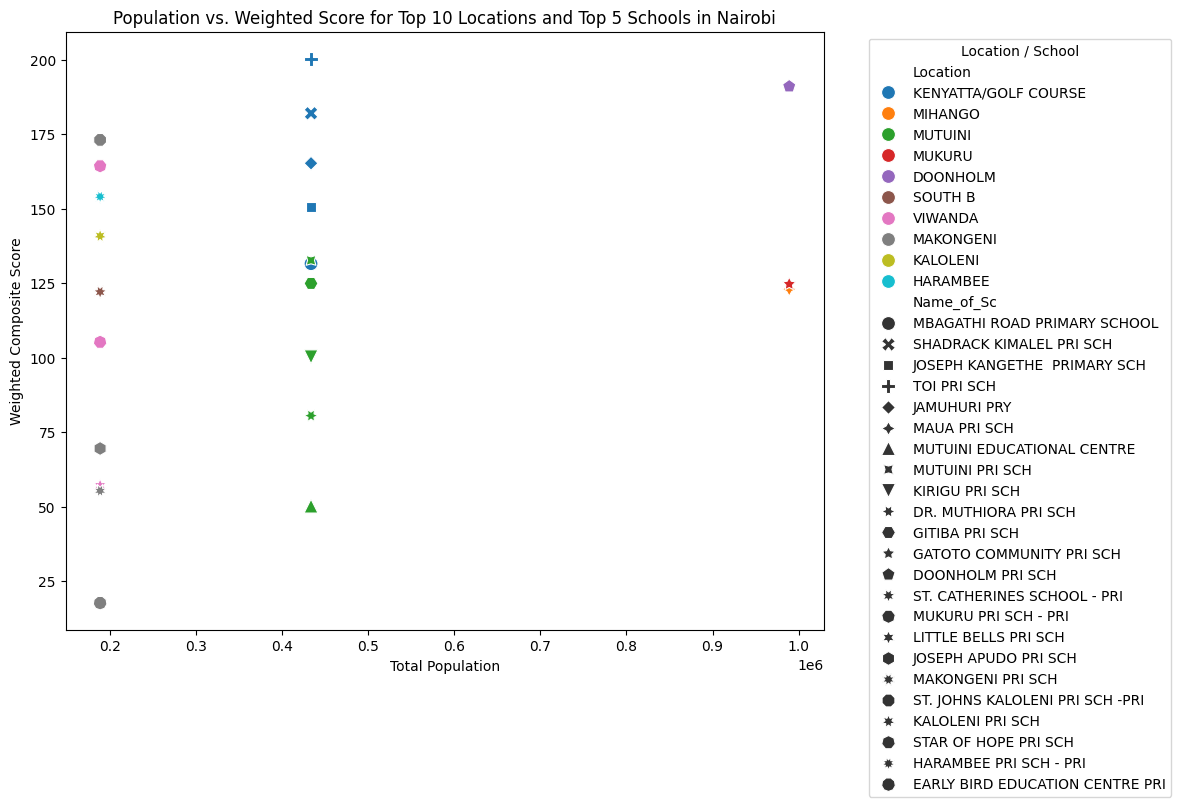

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'data' and 'County_data' DataFrames loaded

# 1. Find Common Areas
common_areas = list(set(data['Division'].unique()) & set(County_data['Division'].unique()))

# 2. Filter Data for Nairobi and Common Areas
nairobi_data = data[(data['Province'] == 'NAIROBI') & (data['Division'].isin(common_areas))]
nairobi_county_data = County_data[County_data['Division'].isin(common_areas)]

# 3. Merge DataFrames based on 'Division'
merged_data = pd.merge(nairobi_data, nairobi_county_data[['Division', 'Total Population']], on='Division', how='left')

# 4. Calculate Weighted Scores (if not already calculated)
# Recalculate WeightedCompositeScore for merged_data
location_data = merged_data.groupby('Name_of_Sc')[['PupilTeach', 'ClassrmRat', 'ToiletRati', 'TotalEnrol']].mean()
weights = {'PupilTeach': 0.4, 'ClassrmRat': 0.3, 'ToiletRati': 0.2, 'TotalEnrol': 0.1}
location_data['WeightedCompositeScore'] = (
    location_data['PupilTeach'] * weights['PupilTeach'] +
    location_data['ClassrmRat'] * weights['ClassrmRat'] +
    location_data['ToiletRati'] * weights['ToiletRati'] +
    location_data['TotalEnrol'] * weights['TotalEnrol']
)

# Merge the WeightedCompositeScore back into merged_data
merged_data = pd.merge(merged_data, location_data[['WeightedCompositeScore']], left_on='Name_of_Sc', right_index=True, how='left')

# 6. Filter for Top Locations and Schools
# a. Get Top 10 Locations by Weighted Score
top_10_locations = merged_data.groupby('Location')['WeightedCompositeScore'].mean().sort_values(ascending=False).head(10).index.tolist()

# b. Filter Data for Top Locations
filtered_data = merged_data[merged_data['Location'].isin(top_10_locations)]

# c. Get Top 5 Schools in Each Location by Weighted Score
top_schools_by_location = {}
for location in top_10_locations:
    top_schools = filtered_data[filtered_data['Location'] == location].sort_values('WeightedCompositeScore', ascending=False).head(5)['Name_of_Sc'].tolist()
    top_schools_by_location[location] = top_schools

# d. Filter Data for Top Schools
top_schools_list = [school for schools in top_schools_by_location.values() for school in schools]
filtered_data = filtered_data[filtered_data['Name_of_Sc'].isin(top_schools_list)]

# 7. Analyze Relationship between Population and Weighted Scores for Top Locations and Schools
# a. Scatter Plot with Location and School Labels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Population', y='WeightedCompositeScore', data=filtered_data, hue='Location', style='Name_of_Sc', s=100)
plt.title('Population vs. Weighted Score for Top 10 Locations and Top 5 Schools in Nairobi')
plt.xlabel('Total Population')
plt.ylabel('Weighted Composite Score')

# Adjust legend location and appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Location / School")

plt.tight_layout()
plt.show()
